In [13]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from scipy.ndimage import gaussian_filter1d
import os

In [14]:
current = np.arange(0,7.04,0.02)
field = 1.61893 + 26.1952 * current # length of field is number of files

# directory = os.path.join("HRRYIG180", "HRRYIG180")
pwd = os.getcwd()
directory = os.path.join(pwd, "HRRYIG180", "HRRYIG180")

In [15]:
def read_s_params(sub_dir, log=True):
    

    files = [f for f in os.listdir(sub_dir) if f.endswith('.csv')]

    s_parameters = dict()

    freqs = pd.read_csv(os.path.join(sub_dir, files[0]), header=0, index_col=0).index.to_numpy()

    for file in files:
        data = pd.read_csv(os.path.join(sub_dir, file), header=0, index_col=0)
        for key in data.keys():
            if key not in s_parameters:
                s_parameters[key] = np.empty((len(files), len(data)))
            if log:
                out_data = 20* np.log10(np.abs(data[key].to_numpy()))
            else:
                out_data = data[key].to_numpy()
            s_parameters[key][files.index(file), :] = out_data

    s_parameters['freqs'] = freqs  

    return s_parameters

In [16]:
def s_param_plot(sub_dir=directory, norm=True, log=True, grad=True, smooth='gaussian', cmap="inferno_r",sigma=5):

    # cmap = "inferno" if not log else "inferno_r"

    s_parameters = read_s_params(sub_dir, log=log)

    fig, ax = plt.subplots(1,1); axs = np.array([ax])
    # fig, axs = plt.subplots(2,2, figsize=(10, 10),sharey=True)
    # keys = ['S11', 'S21', 'S12', 'S22']
    keys = ['S21']
    for i, ax in enumerate(axs.flat):
        plot_data = np.abs(s_parameters[f'{keys[i]}_Real']+1j*s_parameters[f'{keys[i]}_Imaginary'])
        if grad:
            plot_data = np.gradient(plot_data, axis=1) # need to pick CORRECT AXIS
        if norm:
            plot_data -= plot_data[0,:]  # Subtract the first row for normalization
        if smooth == 'gaussian':
            plot_data = gaussian_filter1d(plot_data, sigma=sigma, axis=1)
        if norm:
            maximum = np.max([np.abs(plot_data.min()),np.abs(plot_data.max())])
            im = ax.pcolormesh(field,s_parameters['freqs']*1e-9,plot_data.T,cmap=cmap,vmin=-maximum, vmax=maximum)
        else:
            im = ax.pcolormesh(field,s_parameters['freqs']*1e-9,plot_data.T,cmap=cmap)
        if i % 2 == 0:
            ax.set_ylabel("Freq (GHz)")
        ax.set_xlabel("Field (mT)")
        # ax.set_title(f"{keys[i]} Magnitude")
        ax.set_ylim(2.5,7.5)
    if smooth==None:
        smooth = "un"
    fig.suptitle(os.path.basename(sub_dir)+norm*" Normed"+grad*" grad", fontsize=16)
    plt.tight_layout()
    plt.colorbar(im,label="$S_{21}$"+" (dB)"*log)
    filename = sub_dir + "_normalised"*norm + "_gradient" * grad + "_dB_" * log + smooth+"_smooth" + ".png"
    plt.savefig(filename,transparent=True)
    plt.show()

In [17]:
def s_param_plot_all(sub_dir=directory, norm=True, log=True, grad=True, smooth='gaussian', cmap="inferno_r",sigma=5):

    # cmap = "inferno" if not log else "inferno_r"

    s_parameters = read_s_params(sub_dir, log=log)

    # fig, ax = plt.subplots(1,1); axs = np.array([ax])
    fig, axs = plt.subplots(2,2, figsize=(10, 10),sharey=True)
    keys = ['S11', 'S21', 'S12', 'S22']
    # keys = ['S21']
    for i, ax in enumerate(axs.flat):
        plot_data = np.abs(s_parameters[f'{keys[i]}_Real']+1j*s_parameters[f'{keys[i]}_Imaginary'])
        if grad:
            plot_data = np.gradient(plot_data, axis=1) # need to pick CORRECT AXIS
        if norm:
            plot_data -= plot_data[0,:]  # Subtract the first row for normalization
        if smooth == 'gaussian':
            plot_data = gaussian_filter1d(plot_data, sigma=sigma, axis=1)
        if norm:
            maximum = np.max([np.abs(plot_data.min()),np.abs(plot_data.max())])
            im = ax.pcolormesh(field,s_parameters['freqs']*1e-9,plot_data.T,cmap=cmap,vmin=-maximum, vmax=maximum)
        else:
            im = ax.pcolormesh(field,s_parameters['freqs']*1e-9,plot_data.T,cmap=cmap)
        if i % 2 == 0:
            ax.set_ylabel("Freq (GHz)")
        ax.set_xlabel("Field (mT)")
        ax.set_title(f"{keys[i]} Magnitude")
        ax.set_ylim(2.5,7.5)
    if smooth==None:
        smooth = "un"
    fig.suptitle(os.path.basename(sub_dir)+norm*" Normed"+grad*" grad", fontsize=16)
    plt.tight_layout()
    # plt.colorbar(im,label="$S_{21}$"+" (dB)"*log)
    filename = sub_dir + "_normalised"*norm + "_gradient" * grad + "_dB_" * log + smooth+"_smooth" + ".png"
    # plt.savefig(filename,transparent=True)
    plt.show()

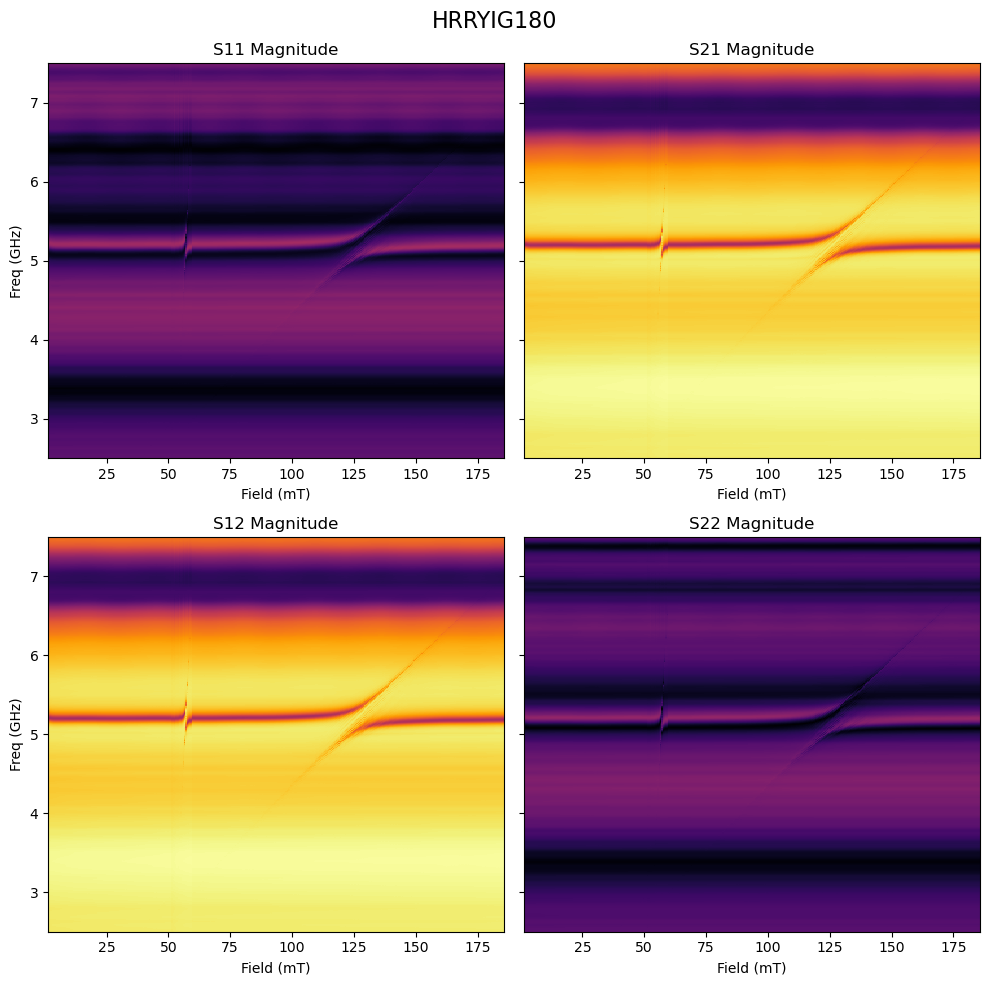

In [18]:
maps = ['PiYG', 'PRGn', 'BrBG', 'PuOr', 'RdGy', 'RdBu', 'RdYlBu',
                      'RdYlGn', 'Spectral', 'coolwarm', 'bwr', 'seismic',
                      'berlin', 'managua', 'vanimo']

# directory = os.path.join(pwd,"HRRYIG180", "HRRYIG180")
# for map in maps:
#     print(map)
#     s_param_plot(cmap=map, sigma=5)#, norm=False) # default values

s_param_plot_all(sub_dir=directory,cmap="inferno",sigma=5,grad=0,norm=0,smooth=None,log=0) # default values

Processing directory: /home/fazinhan/expandaman/cavityCoupling/experimental data/attempt 4/HRRPY180/HRRPY180


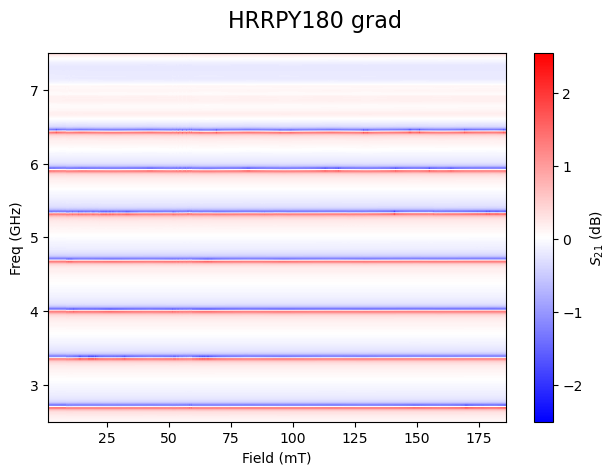

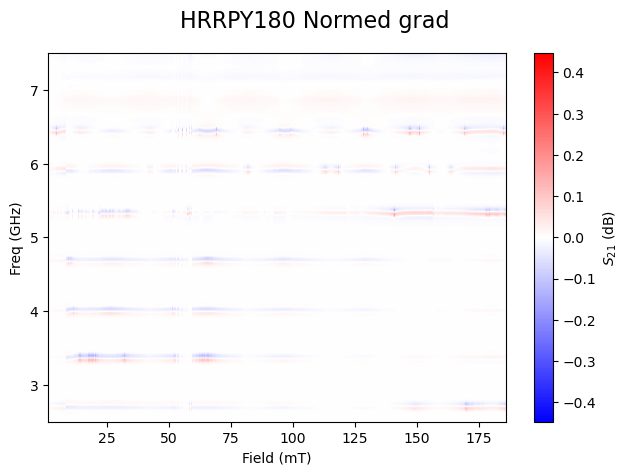

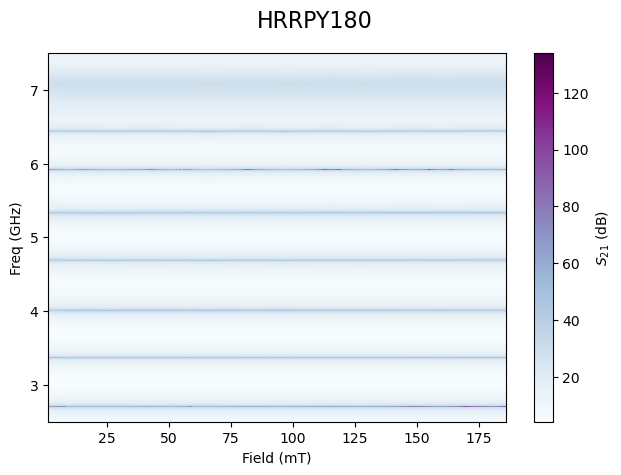

Processing directory: /home/fazinhan/expandaman/cavityCoupling/experimental data/attempt 4/HRRYIG180/HRRYIG180


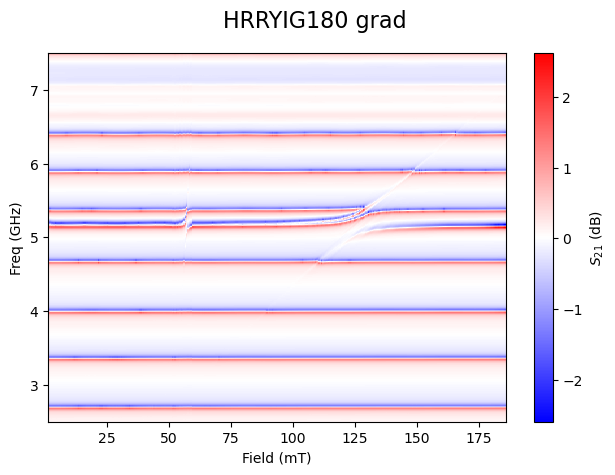

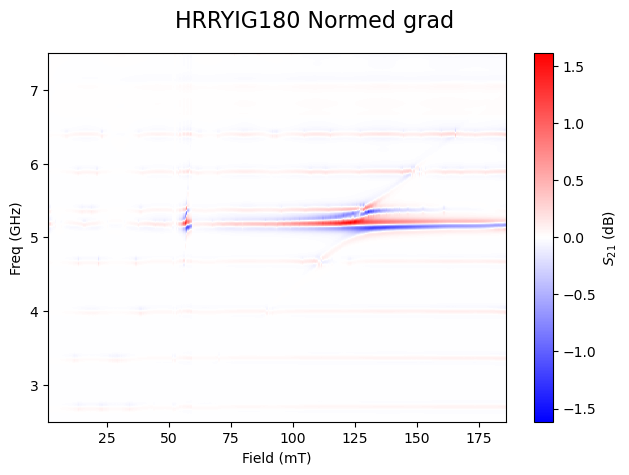

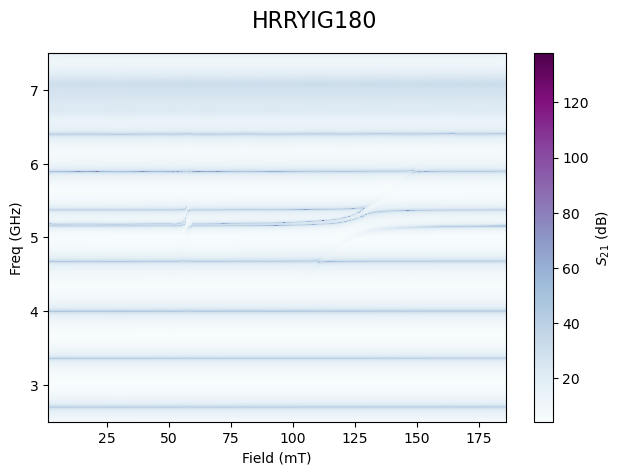

Processing directory: /home/fazinhan/expandaman/cavityCoupling/experimental data/attempt 4/HRRYIG180/HRRYIG_PY


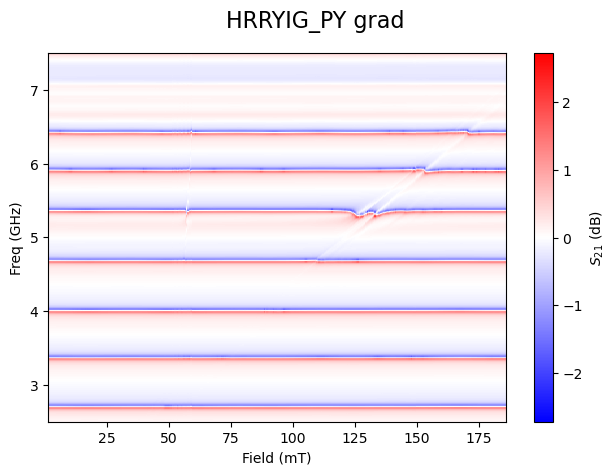

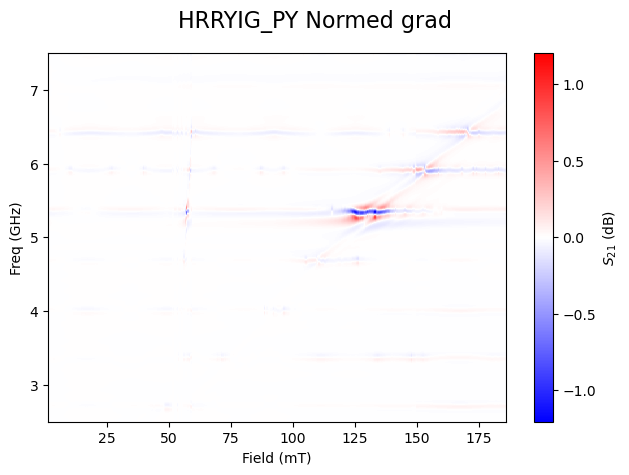

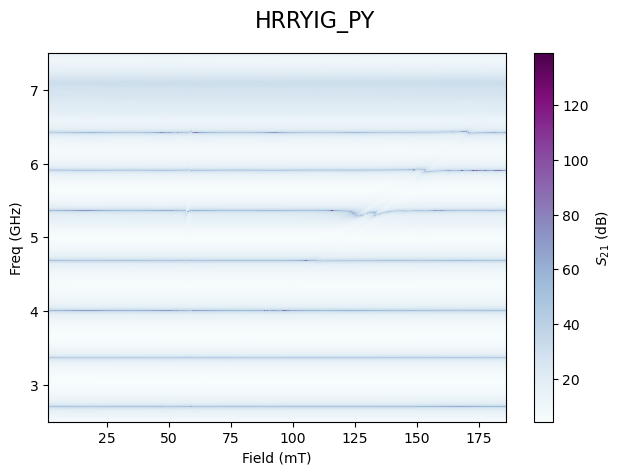

In [20]:
cwd = os.getcwd()
dirs = os.listdir(cwd)
for d in dirs:
    if os.path.isdir(d) and d.startswith("HRR"):
        # Check if there are any directories inside d
        subdirs = [name for name in os.listdir(d) if os.path.isdir(os.path.join(d, name))]
        for sd in subdirs:
            tar_dir = os.path.join(cwd, d, sd)
            print(f"Processing directory: {tar_dir}")
            # s_param_plot(tar_dir, norm=True)
            s_param_plot(tar_dir,norm=False,sigma=5,cmap="bwr") 
            s_param_plot(tar_dir,sigma=10,cmap="bwr") 
            s_param_plot(tar_dir,norm=False,grad=False,smooth=None,cmap="BuPu") 

In [38]:
data = read_s_params(directory)[0]
# data['S21_Real']+1j*data['S21_Imaginary']
# np.savez("s_params_BJ.npz", **data, allow_pickle=False)

In [39]:
s21 = data['S21_Real'] + 1j * data['S21_Imaginary']

# pd.DataFrame(s21, index=field).to_csv("s21.csv")

In [40]:
s21=read_s_params(directory)

In [41]:
s21 = pd.read_csv(os.path.join(directory, "0001.csv"), header=0, index_col=0)

s21

,S11_Real,S11_Imaginary,S21_Real,S21_Imaginary,S12_Real,S12_Imaginary,S22_Real,S22_Imaginary
Frequency (Hz),,,,,,,,
1.000000e+09,-0.091848,0.060031,-0.678350,-0.722863,-0.674557,-0.719784,-0.083818,0.067382
1.002969e+09,-0.090910,0.059935,-0.683376,-0.718207,-0.679547,-0.715065,-0.082635,0.067363
1.005938e+09,-0.089965,0.059900,-0.688362,-0.713451,-0.684541,-0.710305,-0.081386,0.067491
1.008906e+09,-0.088985,0.059966,-0.693325,-0.708648,-0.689497,-0.705519,-0.080045,0.067774
1.011875e+09,-0.088024,0.060156,-0.698216,-0.703820,-0.694373,-0.700678,-0.078634,0.068172
...,...,...,...,...,...,...,...,...
1.998812e+10,0.507465,0.542110,0.013312,0.046103,0.012118,0.046048,0.455351,0.119775
1.999109e+10,0.511458,0.537931,0.013624,0.046193,0.012407,0.046148,0.456942,0.113097
1.999406e+10,0.515349,0.534417,0.013699,0.046173,0.012504,0.046212,0.459646,0.107001


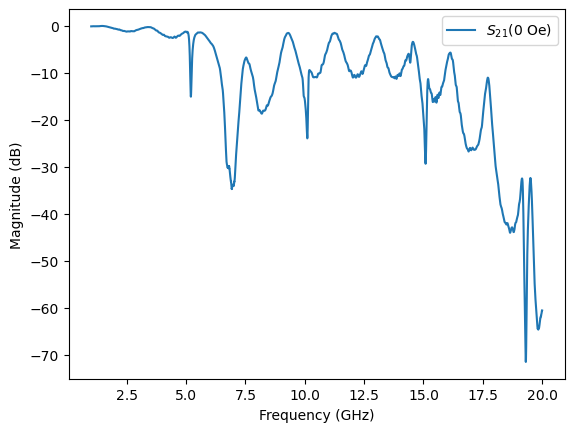

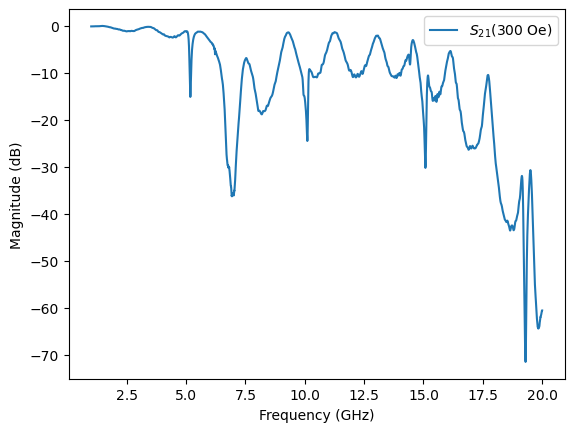

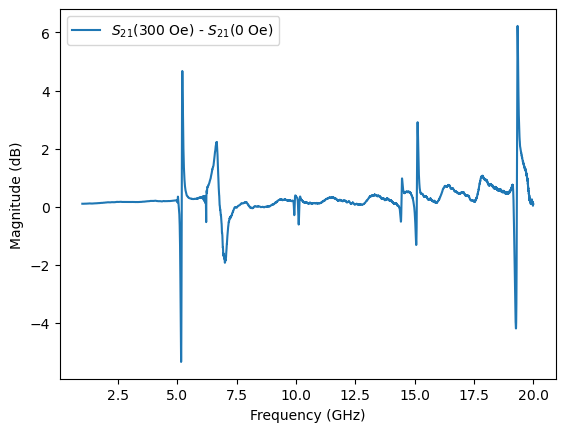

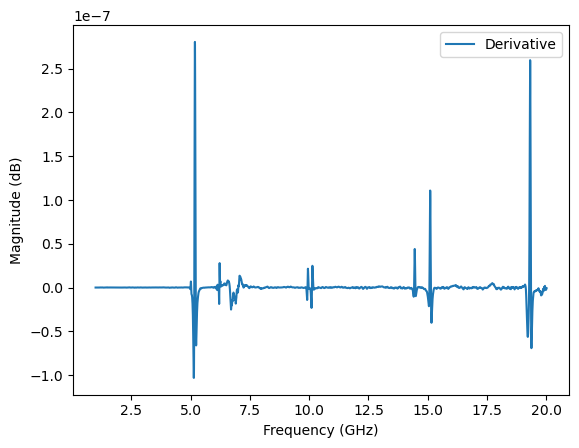

In [42]:
from scipy.ndimage import gaussian_filter1d

# plt.plot(s21.index/1e9, 20*np.log(np.abs(s21['S21_Real'] + 1j * s21['S21_Imaginary'])))
s21_ = pd.read_csv(os.path.join(directory, "0300.csv"), header=0, index_col=0)
data0field = 20*np.log(np.abs(s21['S21_Real'] + 1j * s21['S21_Imaginary']))
data_field = 20*np.log(np.abs(s21_['S21_Real'] + 1j * s21_['S21_Imaginary']))
data = data_field - data0field
derivative = np.gradient(data, s21.index)
smoothed_derivative = gaussian_filter1d(derivative, sigma=3)
smoothed_data = gaussian_filter1d(data, sigma=25)

plt.plot(s21.index/1e9, data0field, label="$S_{21}$(0 Oe)")
plt.legend()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (GHz)")
plt.show()

plt.plot(s21.index/1e9, data_field, label="$S_{21}$(300 Oe)")
plt.legend()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (GHz)")
plt.show()

plt.plot(s21.index/1e9, data, label="$S_{21}$(300 Oe) - $S_{21}$(0 Oe)")
plt.legend()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (GHz)")
plt.show()

plt.plot(s21.index/1e9, smoothed_derivative, label="Derivative")
plt.legend()
plt.ylabel("Magnitude (dB)")
plt.xlabel("Frequency (GHz)")
plt.show()